### The purpose of this analysis is to find which data analysis tools (python, R, excel, SQL, nosql, pandas, ggplot, shiny or matplotlib, powerpoint, powerbi, tableau, html, css, javascript, github, spark, scala, java, pyspark, ec2, s3 etc) are most required by these jobs posted on https://www.reed.co.uk/

In [1]:
# Import required modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Read the scraped csv
df = pd.read_csv("reed_data_analyst_jobs_data_07_Oct_21.csv")
df.head()

,job_title,job_link,date_posted,employer,salary,location,job_type,whole_body
0,Data Analyst,https://www.reed.co.uk/jobs/data-analyst/43851...,2021-08-31,Percepta UK Limited,Competitive salary,East Midlands,FULL_TIME,position summary the data analyst is responsib...
1,Data Analyst,https://www.reed.co.uk/jobs/data-analyst/44005...,2021-09-10,Howden Group Holdings,Salary negotiable,South East England,FULL_TIME,data analyst at hx - we offer a great opportun...
2,Data Analyst,https://www.reed.co.uk/jobs/data-analyst/43916...,2021-09-03,Hays Specialist Recruitment Limited,"£25,000 - £32,000 per annum",South Humberside,FULL_TIME,data analyst / excel skills / sql / dashboards...
3,Data Analyst,https://www.reed.co.uk/jobs/data-analyst/44111...,2021-09-20,X4 Group,Salary negotiable,South East England,"FULL_TIME, CONTRACTOR",there is a brand new opportunity for an experi...
4,Data Analyst,https://www.reed.co.uk/jobs/data-analyst/44111...,2021-09-20,X4 Group,Competitive salary,South East England,"FULL_TIME, CONTRACTOR",there is a brand new opportunity for an experi...


### We will search for tools requirement on "whole_body" column

In [3]:
# This function assigns 1 if the tool is required for the job, otherwise assigns 0.
# Use lowercase all the time for tool name
def tool_require(tool):
    
    # Array of 1 and 0 s if present
    is_present = np.where(df.whole_body.str.contains(fr"\b{(tool)}\b", case=False), 1, 0)
    
    # Create a df with the column name "tool"
    return pd.DataFrame({
        f"{tool}":is_present
    })

In [4]:
# List of tools to search for
tools = [
    "excel",
    "office",
    "powerpoint",
    "powerbi",
    "tableau",
    "python",
    "pandas",
    "numpy",
    "scipy",
    "matplotlib",
    "seaborn",
    "flask",
    "django",
    "streamlit",
    "pyspark",
    "r",
    "ggplot",
    "shiny",
    "sql",
    "nosql",
    "java",
    "scala",
    "spark",
    "html",
    "css",
    "javascript",
    "react",
    "github",
    "ec2",
    "s3",
    "heroku",
    "aws",
    "digital ocean"
]


# Apply the function and check if these tools required for the jobs
tool_df = pd.concat(list(map(tool_require, tools)), axis=1)

# Merge the tool data with the main data
merged_df = pd.concat([df, tool_df], axis=1)

In [5]:
# Top 10 tools
top_10_tools = merged_df.iloc[:, 8:].sum().sort_values(ascending=False).iloc[:10]
top_10_tools

sql           327
excel         310
office        235
python        111
tableau       102
r              68
powerpoint     54
powerbi        45
html           37
javascript     36
dtype: int64

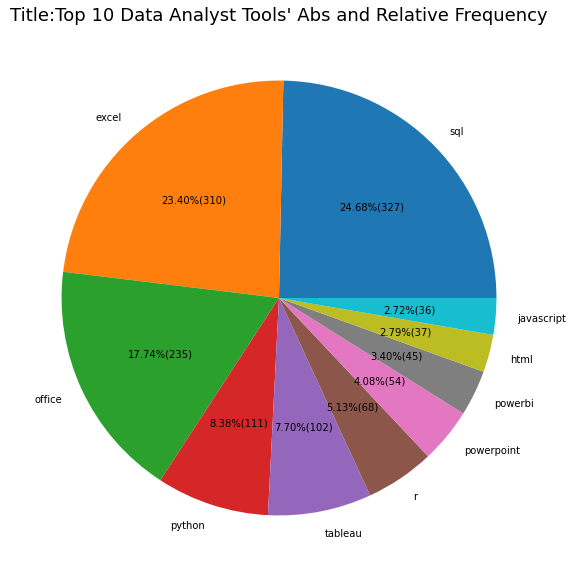

In [6]:
# Plot top 10 tools abs and relative frequency
# Define subplot
fig, ax = plt.subplots(nrows=1, 
                         ncols=1, 
                         figsize=(10,10),
                         )
# Create the plot
top_10_tools.plot.pie(autopct=lambda p: "{:.2f}%({:.0f})".format(p,(p/100)*merged_df.iloc[:, 8:].sum().sort_values(ascending=False).iloc[:10].sum()),
                      ax=ax)
# Set plot title
ax.set_title("Title:Top 10 Data Analyst Tools' Abs and Relative Frequency", fontsize = 18)

# Set tick parameters and fontsize
ax.tick_params(axis = "both", which = "major", labelsize = 16)
ax.tick_params(axis = "both", which = "minor", labelsize = 16)

# Set y label empty
ax.set_ylabel("")
plt.show()

### Takeaway: We can see "sql" is the most preferred (327 or 24.68%) skill required for data analyst, followed by "excel" (23.4% or 310) out of ***674*** job postings. Over 8.3% data analyst jobs require "python" skill while over 5% jobs require "R". Finally, 3.4% job (45 out of 674 jobs postings) require "powerbi" skills.